In [1]:
import numpy as np 
from collections import Counter

from matplotlib import pyplot as plt

In [71]:
P = 10
epsilon = 1
N = 500
k = 3
budget = 30

# Creating a population

In [89]:
def normalize_vec(vec):
    u_max = np.max(vec, axis=1)
    u_min = np.min(vec, axis=1)
    
    ampl = u_max - u_min
    vec = vec - u_min.reshape(-1, 1)
    vec /= ampl.reshape(-1, 1)
    vec /= np.sum(vec, axis=1).reshape(-1,1)
    
    return vec

def make_base_util(P):
    """
        Create a base utility vector
    """
    
    #TODO: expand on this
    return np.random.randint(0, 10, P)

def make_projects(budget, size):
    """
    Create a dictionary with all projects and corresponding prices.
    """
    projects = {}
    #TODO: What would be a good price initialization for the projects?
    for i in range(size):
        price = 1
        # projects[i] = price
        projects[i] = np.random.randint(0, budget/2, 1)[0]
    return projects

def make_voter_utils(base_util, epsilon, n):
    """
    Create utility profiles for n voters. All profiles are based on a base
    utility profile adjusted with random noise. Final voting profiles are
    all normalized with values between 0 and 1.
    """
    base = np.array([base_util for _ in range(n)])

    noise = np.random.normal(0,epsilon,base.shape)
    utils = base_util + noise

    return normalize_vec(utils)


# initialize vectors
base_util = make_base_util(P)
project_prizes = make_projects(budget, P)

# create utilities for voters
utilities = make_voter_utils(base_util, epsilon, N)

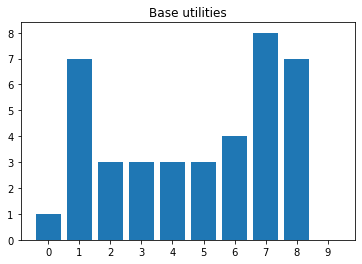

In [90]:
plt.bar(range(len(base_util)), base_util)
plt.xticks(range(len(base_util)))
plt.title("Base utilities")
plt.show()

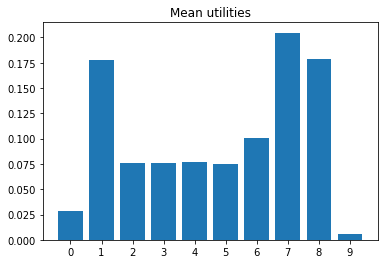

In [91]:
plt.bar(range(len(base_util)), np.mean(utilities, axis=0))
plt.xticks(range(len(base_util)))
plt.title("Mean utilities")
plt.show()

# Calculating scores for different k-values

In [92]:
def k_approval(k, utils):
    """
    Extract the k alternatives with the highest utility for
    all voters.
    """
    votes = np.argsort(utils, axis=1)[:, :k]
    return Counter(votes.reshape(-1))


def greedy_allocation(votes, projects, budget):
    """
    Use greedy approval to allocate the budget to the most-preferred
    projects of the voters. 
    """
    # Create top-k ranking/approval
    allocation = set()
    most_votes = votes.most_common()

    lowest_price = np.min(list(projects.values()))
    for project in most_votes:
            
        project_to_add = project[0]
        price = projects[project_to_add]

        if budget >= price:
            allocation.add(project_to_add)
            budget -= price

        if budget < lowest_price:
            break

    return allocation

def calculate_sw(utils, winners):
    """
    Calculate the utilitarian social welfare, averaged over
    the amount of voters.
    """
    sw = utils[:, list(winners)]
    sw = np.sum(sw, axis=1)
    sw = np.mean(sw)
    return sw

In [97]:
wellfares = []

for k in range(1, P):
    # calculate scores for all projects
    votes = k_approval(k, utilities)
    # print(f"votes: {votes}")

    # determine the winning projects
    winners = greedy_allocation(votes, project_prizes, budget)
    # print(f"winners: {winners}")

    # calculate loss
    sw = calculate_sw(utilities, winners)
    
    wellfares.append(sw)

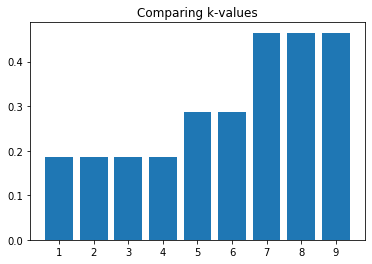

In [99]:
plt.bar(range(1, P), wellfares)
plt.xticks(range(1, P))
plt.title("Comparing k-values")
plt.show()

In [2]:
x = np.array([[1,2,5,2,4,1],
            [6,1,3,2,3,1]])

In [5]:
print(np.argsort(x))

[[0 5 1 3 4 2]
 [1 5 3 2 4 0]]


In [7]:
print(np.argsort(x)[:,::-1])

[[2 4 3 1 5 0]
 [0 4 2 3 5 1]]
